In [2]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/support_vector_machines

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 117, done.
remote: Counting objects: 100% (117/117), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 117 (delta 47), reused 99 (delta 29), pack-reused 0
Receiving objects: 100% (117/117), 33.38 MiB | 21.64 MiB/s, done.
Resolving deltas: 100% (47/47), done.
/content/machine_learning_1/support_vector_machines


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utils
from sklearn.svm import SVC,SVR
import random

# Building an SVM to separate a linear dataset

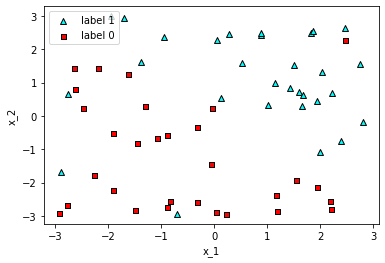

In [4]:
# Loading the linear dataset

linear_data = pd.read_csv('linear.csv')
features = np.array(linear_data[['x_1', 'x_2']])
labels = np.array(linear_data['y'])
utils.plot_points(features, labels)

Accuracy: 0.9333333333333333


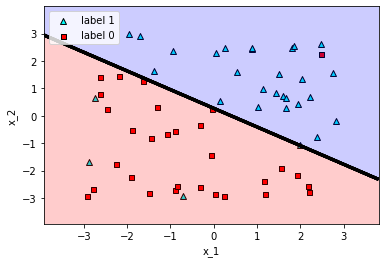

In [5]:
from sklearn.svm import SVC
#use linear SVM
svm_linear = SVC(kernel='linear').fit(features, labels)


print("Accuracy:", svm_linear.score(features, labels))
utils.plot_model(features, labels, svm_linear)

C = 0.01
Accuracy: 0.8666666666666667


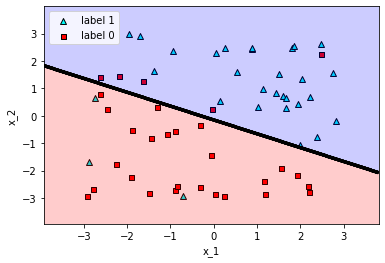

C = 100
Accuracy: 0.9166666666666666


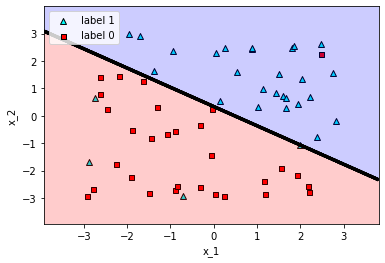

In [6]:
# use linear SVM with C = 0.01

svm_c_001 = SVC(kernel='linear', C=.01).fit(features, labels)

print("C = 0.01")
print("Accuracy:", svm_c_001.score(features, labels))
utils.plot_model(features, labels, svm_c_001)

# use linear SVM with C = 100
svm_c_100 = SVC(kernel='linear', C=100).fit(features, labels)

print("C = 100")
print("Accuracy:", svm_c_100.score(features, labels))
utils.plot_model(features, labels, svm_c_100)

# Building polynomial kernels for a circular dataset

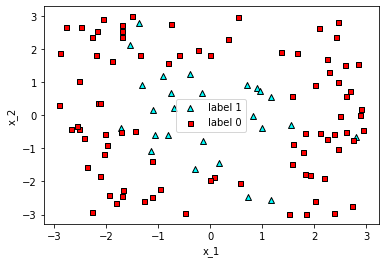

In [7]:
# Loading the one_circle dataset

circular_data = pd.read_csv('one_circle.csv')
features = np.array(circular_data[['x_1', 'x_2']])
labels = np.array(circular_data['y'])
utils.plot_points(features, labels)

Polynomial kernel of degree = 2
Accuracy: 0.9181818181818182


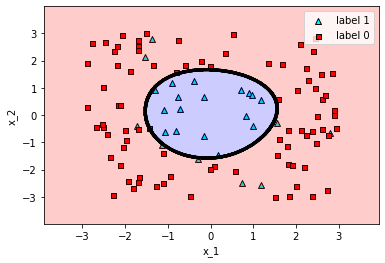

Polynomial kernel of degree = 4
Accuracy: 0.9181818181818182


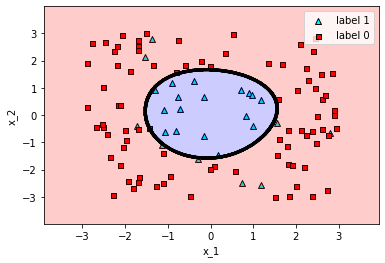

In [8]:
# use poly SVM with Degree = 2
svm_degree_2 = SVC(degree = 2).fit(features, labels)

print("Polynomial kernel of degree = 2")
print("Accuracy:", svm_degree_2.score(features, labels))
utils.plot_model(features, labels, svm_degree_2)

# use poly SVM with Degree = 4
svm_degree_4 = SVC(degree = 4).fit(features, labels) 

print("Polynomial kernel of degree = 4")
print("Accuracy:", svm_degree_4.score(features, labels))
utils.plot_model(features, labels, svm_degree_4)

# Experimenting with gammas in the rbf kernel

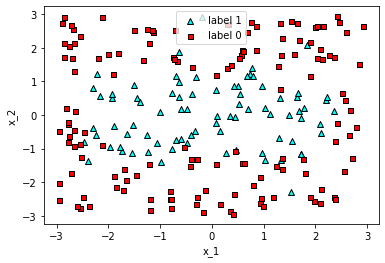

In [9]:
# Loading the two_circles dataset

two_circles_data = pd.read_csv('two_circles.csv')
features = np.array(two_circles_data[['x_1', 'x_2']])
labels = np.array(two_circles_data['y'])
utils.plot_points(features, labels)

Gamma = 0.1
Accuracy: 0.6318181818181818


/content/machine_learning_1/support_vector_machines/utils.py:37: UserWarning: No contour levels were found within the data range.
  pyplot.contour(xx, yy, Z,colors = 'k',linewidths = 3)


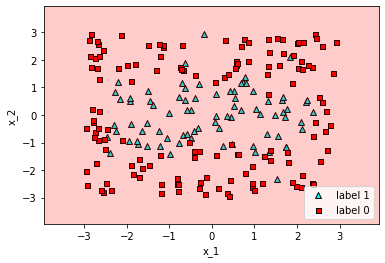

Gamma = 1
Accuracy: 0.9045454545454545


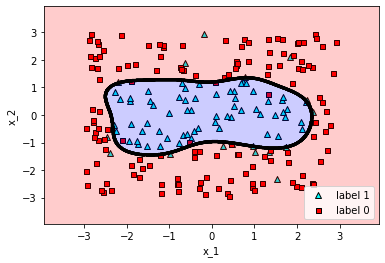

Gamma = 10
Accuracy: 0.9636363636363636


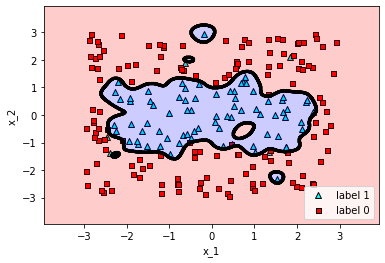

Gamma = 100
Accuracy: 0.990909090909091


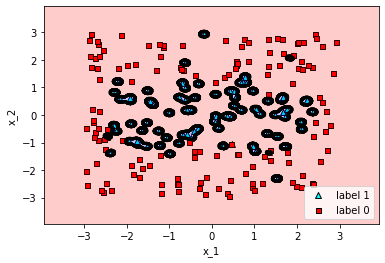

In [11]:
# use SVM rbf with gamma = 0.1
svm_gamma_01 = SVC(gamma=.01).fit(features, labels)

print("Gamma = 0.1")
print("Accuracy:", svm_gamma_01.score(features, labels))
utils.plot_model(features, labels, svm_gamma_01)

# use SVM rbf with gamma = 1
svm_gamma_1 = SVC(gamma= 1).fit(features, labels)

print("Gamma = 1")
print("Accuracy:", svm_gamma_1.score(features, labels))
utils.plot_model(features, labels, svm_gamma_1)

# use SVM rbf with gamma = 10
svm_gamma_10 = SVC(gamma=10  ).fit(features, labels)

print("Gamma = 10")
print("Accuracy:", svm_gamma_10.score(features, labels))
utils.plot_model(features, labels, svm_gamma_10)

# use SVM rbf with gamma = 100
svm_gamma_100 = SVC(gamma=100).fit(features, labels)

print("Gamma = 100")
print("Accuracy:", svm_gamma_100.score(features, labels))
utils.plot_model(features, labels, svm_gamma_100)

# Support Vector Regression (SVC)

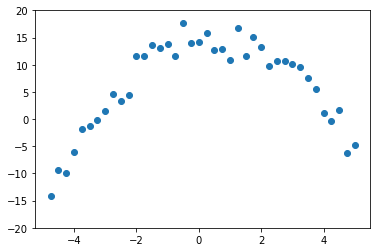

In [12]:
# Our original polynomial is -x^2+x+15
coefs = [15,1,-1]

def polynomial(coefs, x):
    n = len(coefs)
    return sum([coefs[i]*x**i for i in range(n)])

def draw_polynomial(coefs):
    n = len(coefs)
    x = np.linspace(-5, 5, 1000)

draw_polynomial(coefs)
X = []
Y = []
x=-5
for i in range(40):
    x = x+0.25
    y = polynomial(coefs, x) + random.gauss(0,2)
    X.append(x)
    Y.append(y)
X=np.array(X)
Y=np.array(Y)
plt.ylim(-20,20)
plt.scatter(X, Y)

In [22]:
# use poly SVR with degree 2 
svr = SVR(kernel='poly',degree=2).fit(X.reshape(-1, 1), Y)

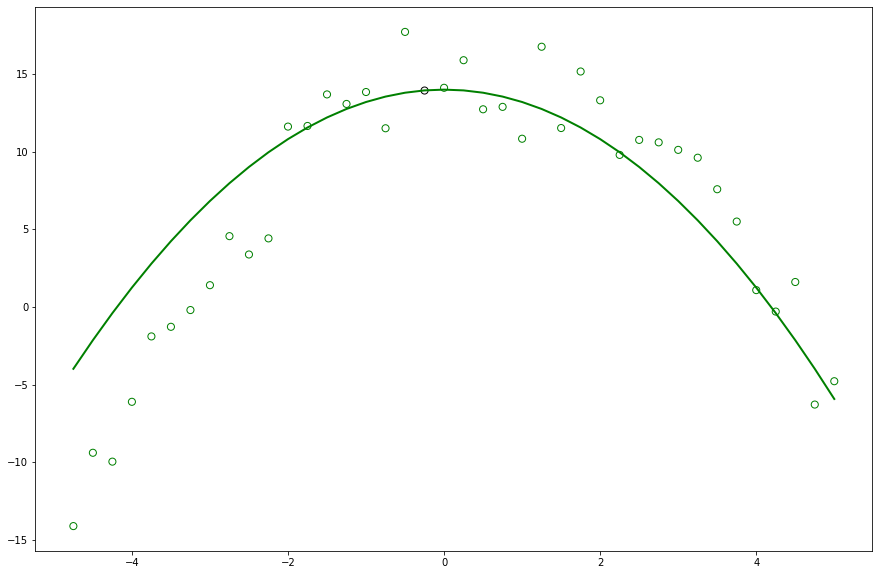

In [23]:
from sklearn.metrics import mean_squared_error
def display_results(svr,X,Y):
  X=np.array(X)
  y=np.array(Y)
  lw = 2

  svrs = ['svr_poly']
  kernel_label = ['Polynomial']
  model_color = ['g']

  fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 10), sharey=True)
  for ix, _ in enumerate(svrs):
      plt.plot(X, svr.predict(X.reshape(-1, 1)), color=model_color[ix], lw=lw,
                    label='{} model'.format(kernel_label[ix]))
      plt.scatter(X[svr.support_], y[svr.support_], facecolor="none",
                      edgecolor=model_color[ix], s=50,
                      label='{} support vectors'.format(kernel_label[ix]))
      plt.scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)],
                      y[np.setdiff1d(np.arange(len(X)), svr.support_)],
                      facecolor="none", edgecolor="k", s=50,
                      label='other training data')
display_results(svr,X,Y)